# Exchange Rates

Below, I visualize two aspects of exchange rates between 1999 and 2022:
1. The USD/Euro exchange rate during the 2007-2008 financial crisis
1. The USD/Euro exchange rate under the presidencies of Clinton (partial), Bush, Obama, Trump, and Biden (partial)

### Data

The data contains the daily exchange rate of the following currencies against the Euro between January 4, 1999 and January 10, 2022:
* Australian dollar
* Brazilian real
* Bulgarian lev
* Canadian dollar
* Chinese yuan renminbi
* Croatian kuna
* Cypriot pound
* Czech koruna
* Danish krone
* Estonian kroon
* UK pound sterling
* Greek drachma
* Hong Kong dollar
* Hungarian forint
* Iceland krona
* Indian rupee
* Indonesian rupiah
* Israeli shekel
* Japanese yen
* Korean won
* Latvian lats
* Lithuanian litas
* Malaysian ringgit
* Maltese lira
* Mexican peso
* Norwegian krone
* New Zealand dollar
* Philippine peso
* Polish zloty
* Romanian leu
* Russian rouble
* Swedish krona
* Swiss franc
* Singapore dollar
* Slovenian tolar
* Slovak koruna
* South African rand
* Thai baht
* Turkish lira
* US dollar

All data is provided by European Central Bank [Statistical Data WareHouse, EXR - Exchange Rates](https://sdw.ecb.europa.eu/browseExplanation.do?node=1495).


In [1]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style


In [2]:
# read in data and explore

exchange_rates_df = pd.read_csv('euro-daily-hist_1999_2022.csv')

print(exchange_rates_df.head())
# print(exchange_rates_df.tail())
print(exchange_rates_df.info())


  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2022-01-10               1.5774           1.9558            6.3969   
1   2022-01-07               1.5804           1.9558            6.4343   
2   2022-01-06               1.5778           1.9558            6.4420   
3   2022-01-05               1.5600           1.9558            6.4146   
4   2022-01-04               1.5682           1.9558            6.4174   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.4327         1.0446                   7.2128              NaN   
1             1.4374         1.0422                   7.2060              NaN   
2             1.4451         1.0395                   7.2187              NaN   
3             1.4399         1.0364                   7.2087              NaN   
4             1.4382         1.0355                   7.1924              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
# clean up the dataset

# rename columns
for col in exchange_rates_df.columns:
    exchange_rates_df.rename(columns={col: col.replace('[', '').replace(']', '').strip().replace(' ', '_')}, inplace=True)
    
exchange_rates_df.rename(columns={r'Period\Unit:': 'Time'}, inplace=True)

# convert time to dt and resort
exchange_rates_df['Time'] = pd.to_datetime(exchange_rates_df['Time'])
exchange_rates_df.sort_values('Time', inplace=True)
exchange_rates_df.reset_index(drop=True, inplace=True)
                                 

In [4]:
# explore and clean the usd exchange rate

euro_to_dollar_df = exchange_rates_df[['Time', 'US_dollar']]

# print(euro_to_dollar_df['US_dollar'].value_counts())

# drop rows with no exhchange rate
euro_to_dollar_df = euro_to_dollar_df[euro_to_dollar_df['US_dollar'] != '-']

# convert to float
euro_to_dollar_df['US_dollar'] = euro_to_dollar_df['US_dollar'].astype(float)


In [5]:
# add rolling mean

euro_to_dollar_df['rolling_30d_mean'] = euro_to_dollar_df['US_dollar'].rolling(30).mean()


# 2007-2008 Financial Crisis

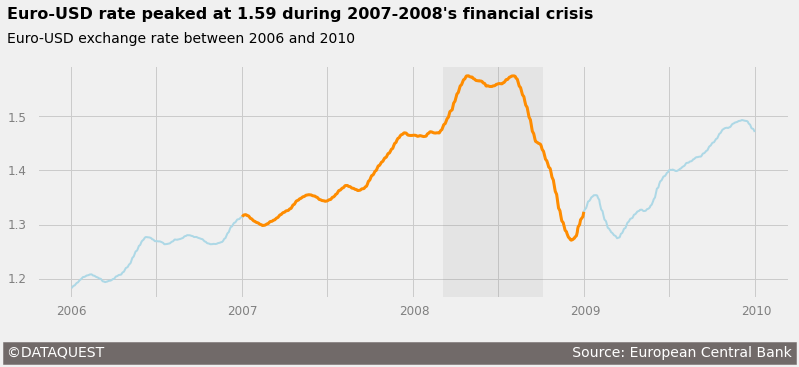

In [6]:
# create the viz

# split into the two timeframes for the lines
recession_0609_df = euro_to_dollar_df[(euro_to_dollar_df['Time'].dt.year >= 2006) & (euro_to_dollar_df['Time'].dt.year <= 2009)]
recession_0708_df = euro_to_dollar_df[(euro_to_dollar_df['Time'].dt.year >= 2007) & (euro_to_dollar_df['Time'].dt.year <= 2008)]

# use the fivethirtyeight style
style.use('fivethirtyeight')

# create the plot
fig, ax = plt.subplots(figsize=(12, 4))

# add the shaded area
ax.axvline(x=14050, ymin=0, ymax=1,
            linewidth=100, color='grey', alpha=0.1)

# plot the lines
ax.plot(recession_0609_df['Time'], recession_0609_df['rolling_30d_mean'],
       color='lightblue', linewidth=2)
ax.plot(recession_0708_df['Time'], recession_0708_df['rolling_30d_mean'],
       color='darkorange', linewidth=3)

# # print the coordinates
# print(ax.get_xticks())
# print(ax.get_yticks())

# reformat the x ticks
ax.set_xticklabels([])
x = 0.025
for year in range(2006, 2011):
    ax.text(x, -0.07, str(year), transform=ax.transAxes, color='grey', fontsize=12)
    x += 0.228

# reformat the y ticks
ax.set_yticklabels([])
y = 0.07
for tk in [1.2, 1.3, 1.4, 1.5]:
    ax.text(-0.04, y, str(tk), transform=ax.transAxes, color='grey', fontsize=12)
    y += 0.23

# add titles
ax.text(-0.04, 1.2, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", transform=ax.transAxes, 
        fontsize=16, weight='bold')
ax.text(-0.04, 1.1, "Euro-USD exchange rate between 2006 and 2010", transform=ax.transAxes)

# add dataquest band
ax.text(-0.04, -0.25, '©DATAQUEST' + ' ' * 104 + 'Source: European Central Bank', transform=ax.transAxes,
        color='white', backgroundcolor='#716A69')

plt.show()




# US President Comparison

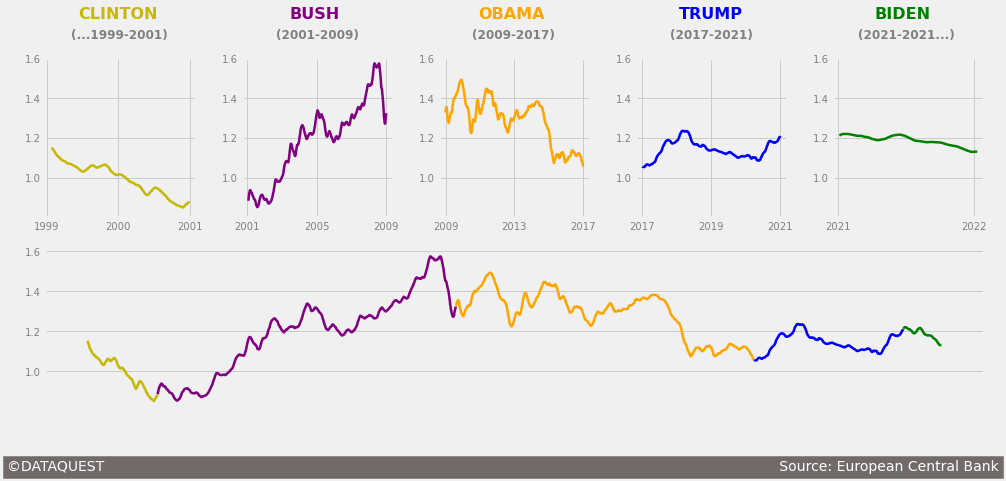

In [7]:
# create the viz

# function to evenly disperse ticks
def set_ticks(ax, start_tk_pos, end_tick_pos, num_ticks, year_list):
    x_tk = start_tk_pos
    x_tk_list = []
    for tk in range(0, num_ticks):
        x_tk_list.append(x_tk)
        x_tk += (end_tick_pos - start_tk_pos) / (num_ticks - 1)
    ax.set_xticks(x_tk_list)
    ax.set_xticklabels(year_list, color='grey', fontsize=10)

    
# split by president
clinton_df = euro_to_dollar_df[euro_to_dollar_df['Time'].dt.year < 2001]
bush_df = euro_to_dollar_df[(euro_to_dollar_df['Time'].dt.year >= 2001) & (euro_to_dollar_df['Time'].dt.year < 2009)]
obama_df = euro_to_dollar_df[(euro_to_dollar_df['Time'].dt.year >= 2009) & (euro_to_dollar_df['Time'].dt.year < 2017)]
trump_df = euro_to_dollar_df[(euro_to_dollar_df['Time'].dt.year >= 2017) & (euro_to_dollar_df['Time'].dt.year < 2021)]
biden_df = euro_to_dollar_df[euro_to_dollar_df['Time'].dt.year >= 2021]
prez_dfs = [clinton_df, bush_df, obama_df, trump_df, biden_df]
prez_colors = ['#C6B804', 'purple', 'orange', 'blue', 'green']

# set the style
style.use('fivethirtyeight')

# create the plot - 2x5 with bottom row empty and 2x1 with top row empty
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(2,5,1)
ax2 = plt.subplot(2,5,2)
ax3 = plt.subplot(2,5,3)
ax4 = plt.subplot(2,5,4)
ax5 = plt.subplot(2,5,5)
ax6 = plt.subplot(2,1,2)
top_axes = [ax1, ax2, ax3, ax4, ax5]

# adjust padding
plt.subplots_adjust(wspace=0.3, hspace=0.2)


# # # top plots # # #

# plot by president
for ax, df, c in zip(top_axes, prez_dfs, prez_colors):
    ax.plot(df['Time'], df['rolling_30d_mean'], color=c, linewidth=2.5)
    ax.set_ylim([0.8, 1.6])
    ax.set_xticklabels([])
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], color='grey', fontsize=10)
    
#     # # print the coordinates
#     print(ax.get_xticks())
#     print(ax.get_yticks())
    
# set the ticks
set_ticks(ax1, 10610.0, 11323.0, 3, ['1999', '2000', '2001'])
set_ticks(ax2, 11300.0, 14245.0, 3, ['2001', '2005', '2009'])
set_ticks(ax3, 14250.0, 17167.0, 3, ['2009', '2013', '2017'])
set_ticks(ax4, 17167.0, 18628.0, 3, ['2017', '2019', '2021'])
set_ticks(ax5, 18628.0, 18993.0, 2, ['2021', '2022'])

# add titles
ax1.text(10770, 1.8, 'CLINTON', color='#C6B804', fontsize=16, weight='bold')
ax1.text(10730, 1.7, '(...1999-2001)', color='grey', fontsize=12, weight='bold')
ax2.text(12200, 1.8, 'BUSH', color='purple', fontsize=16, weight='bold')
ax2.text(11900, 1.7, '(2001-2009)', color='grey', fontsize=12, weight='bold')
ax3.text(14950, 1.8, 'OBAMA', color='orange', fontsize=16, weight='bold')
ax3.text(14800, 1.7, '(2009-2017)', color='grey', fontsize=12, weight='bold')
ax2.text(20450, 1.8, 'TRUMP', color='blue', fontsize=16, weight='bold')
ax2.text(20250, 1.7, '(2017-2021)', color='grey', fontsize=12, weight='bold')
ax2.text(24600, 1.8, 'BIDEN', color='green', fontsize=16, weight='bold')
ax2.text(24250, 1.7, '(2021-2021...)', color='grey', fontsize=12, weight='bold')


# # # bottom plot # # #

# plot the lines
for df, c in zip(prez_dfs, prez_colors):
    ax6.plot(df['Time'], df['rolling_30d_mean'], color=c, linewidth=2.5)

# # # # print the coordinates
# print(ax6.get_xticks())
# print(ax6.get_yticks())
    
# format the ticks
ax6.set_yticks([1.0, 1.2, 1.4, 1.6])
ax6.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], color='grey', fontsize=10)
ax6.set_xticks([])


# add dataquest band
ax6.text(9850.0, 0.5, '©DATAQUEST' + ' ' * 150 + 'Source: European Central Bank',
        color='white', backgroundcolor='#716A69')
    
plt.show()
    
